**Ứng dụng học máy cải thiện lòng trung thành của khách hàng**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.inspection import permutation_importance
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [3]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Import Data

In [52]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# from google.colab import files
# uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [55]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.shape

(7043, 21)

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* SeniorCitizen phải là dữ liệu phân loại vì có giá trị tối thiểu là 0 và giá trị tối đa là 1.

* Thời gian trung bình khách hàng gắn bó tại công ty là 32 tháng và 75% khách hàng gắn bó lâu dài với công ty là 55 tháng.

* Phí trung bình hàng tháng là 64,76 USD và 25% khách hàng phải trả hơn 89,85 USD

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

Loại bỏ trường CustomerID vì không có giá trị hữu ích

In [61]:
df = df.drop(['customerID'], axis = 1)

Trường TotalCharges có các giá trị số nhưng đàn ở dạng object nên cần chuyển đổi về numeric.

*errors='coerce'* chuyển đổi các dữ liệu không phải số về giá trị NaN

In [62]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

Trường TotalCharges có các giá trị số nhưng đàn ở dạng object nên cần chuyển đổi về numeric.

*errors='coerce'* chuyển đổi các dữ liệu không phải số về giá trị NaN

Thay các giá trị NaN của cột Totalcharge đã chuyển đổi ở trên bằng giá trị trung bình

In [63]:
df.fillna(df['TotalCharges'].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [64]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

Xóa các dòng của cột tenure có giá trị là 0



---



## **Trực quan biến mục tiêu**

<ipython-input-10-dea82b5ce885>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Churn"],palette="Blues")


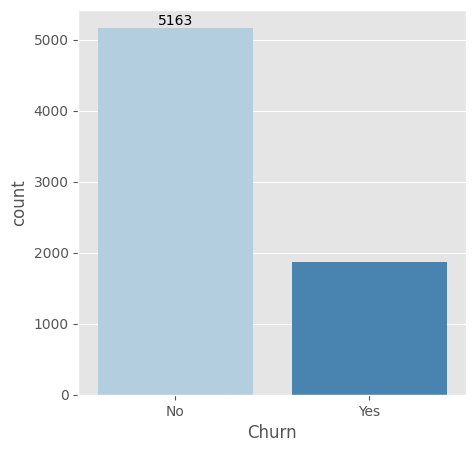

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

Biểu đồ thanh sau đây hiển thị biến mục tiêu của tỷ lệ rời bỏ có và không. Tỷ lệ rời bỏ là một tập dữ liệu không cân bằng vì cả hai lớp không được phân bổ đều. Để xử lý nó, lấy mẫu lại sẽ là một cách tiếp cận phù hợp. Để đơn giản hóa điều này, chúng tôi sẽ giữ tập dữ liệu không cân bằng và sử dụng nhiều ma trận đánh giá để đánh giá các mô hình.

**Phân tích dịch vụ từng khách hàng**

In [11]:
# Tạo một hàm để vẽ dữ liệu phân loại theo biến mục tiêu
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)

    fig = plt.figure(figsize = (12, 5*number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

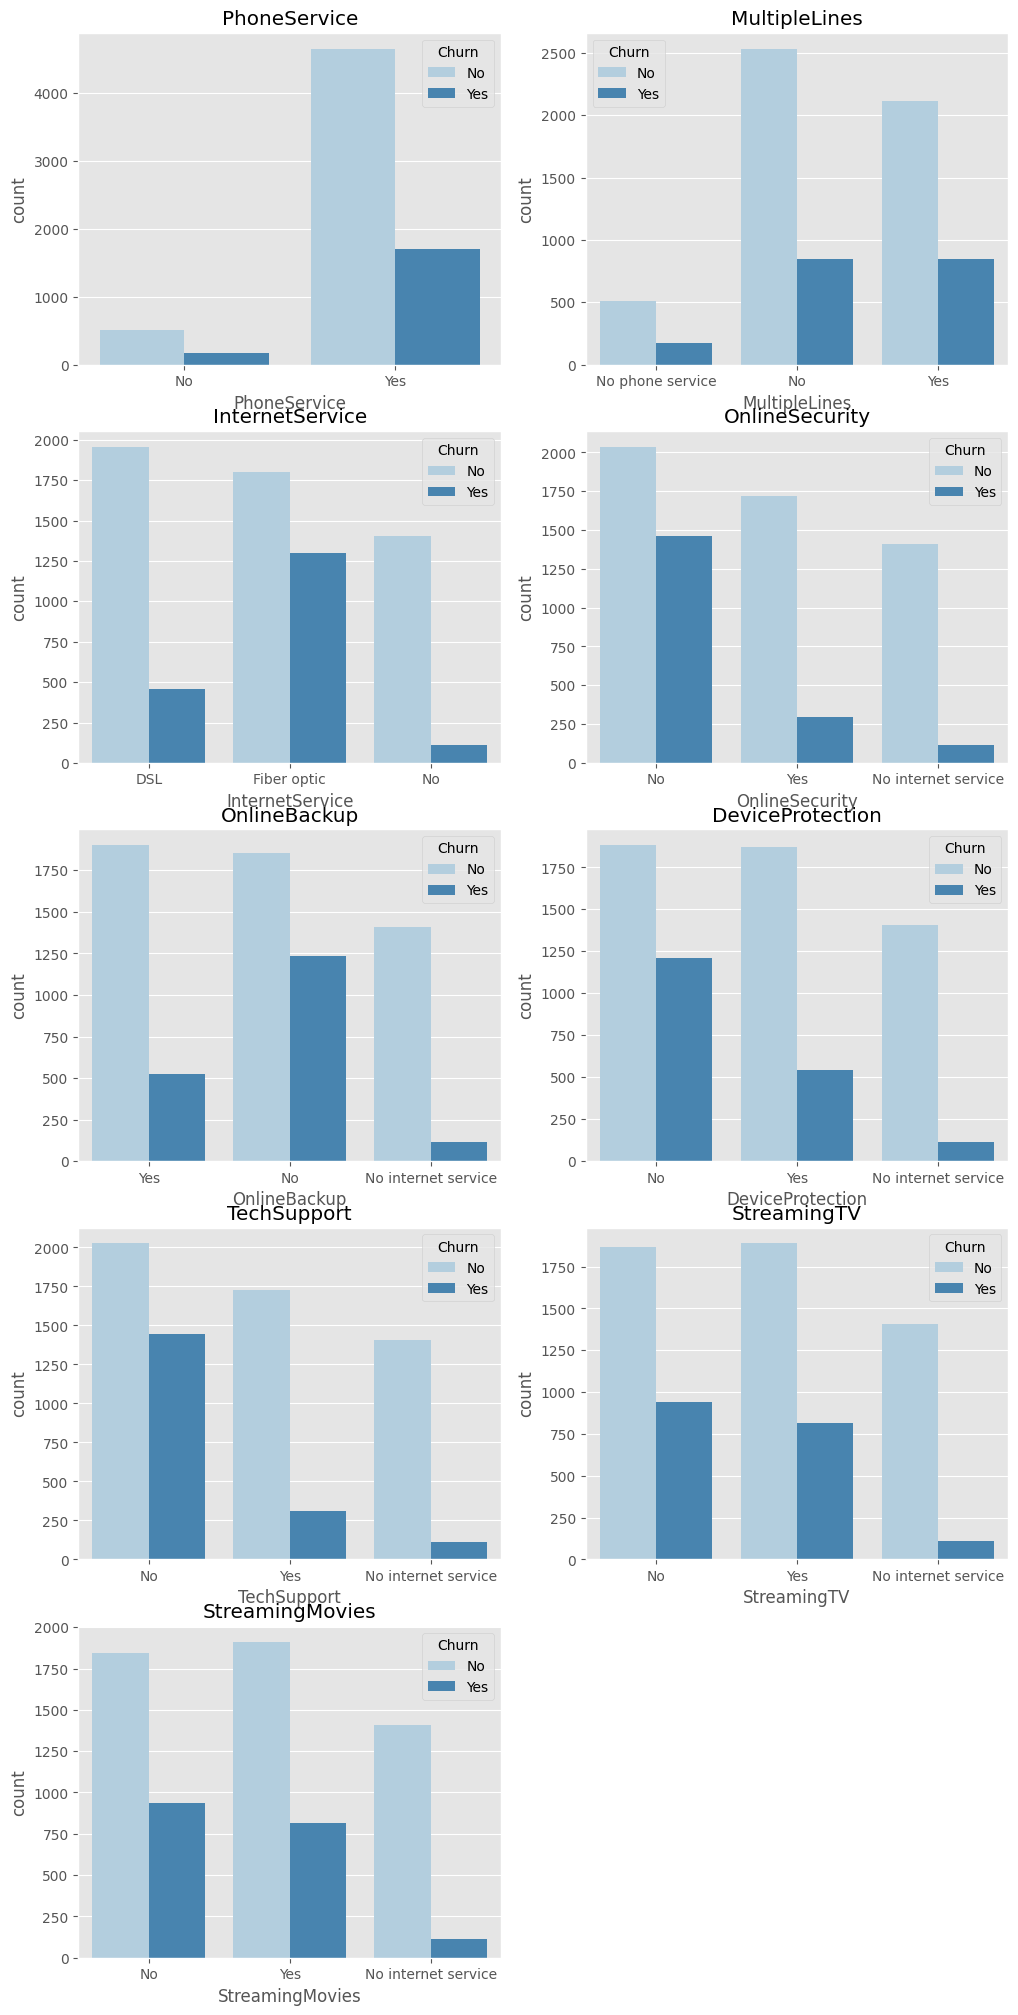

In [12]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

> Chúng ta có thể rút ra các kết luận sau bằng cách đánh giá các thuộc tính dịch vụ

* Tỷ lệ rời bỏ cao hơn vừa phải đối với những khách hàng sử dụng dịch vụ điện
thoại (Phone Service).

* Khách hàng sử dụng dịch vụ internet cáp quang có tỷ lệ rời mạng cao hơn so với DSL và No (Internet Service) .

* Tỷ lệ rời bỏ cao hơn nhiều đối với khách hàng không có bảo mật trực tuyến (Online Sercurity).

* Những khách hàng không được tiếp cận với bộ phận hỗ trợ kỹ thuật có xu hướng rời đi thường xuyên hơn những khách hàng có khả năng tiếp cận (Tech Support).

* Những khách hàng không có bản sao lưu trực tuyến và bảo vệ thiết bị có tỷ lệ rời bỏ cao hơn (online backup and device protection).

**Phân tích Thông tin tài khoản khách hàng — Biến phân loại**

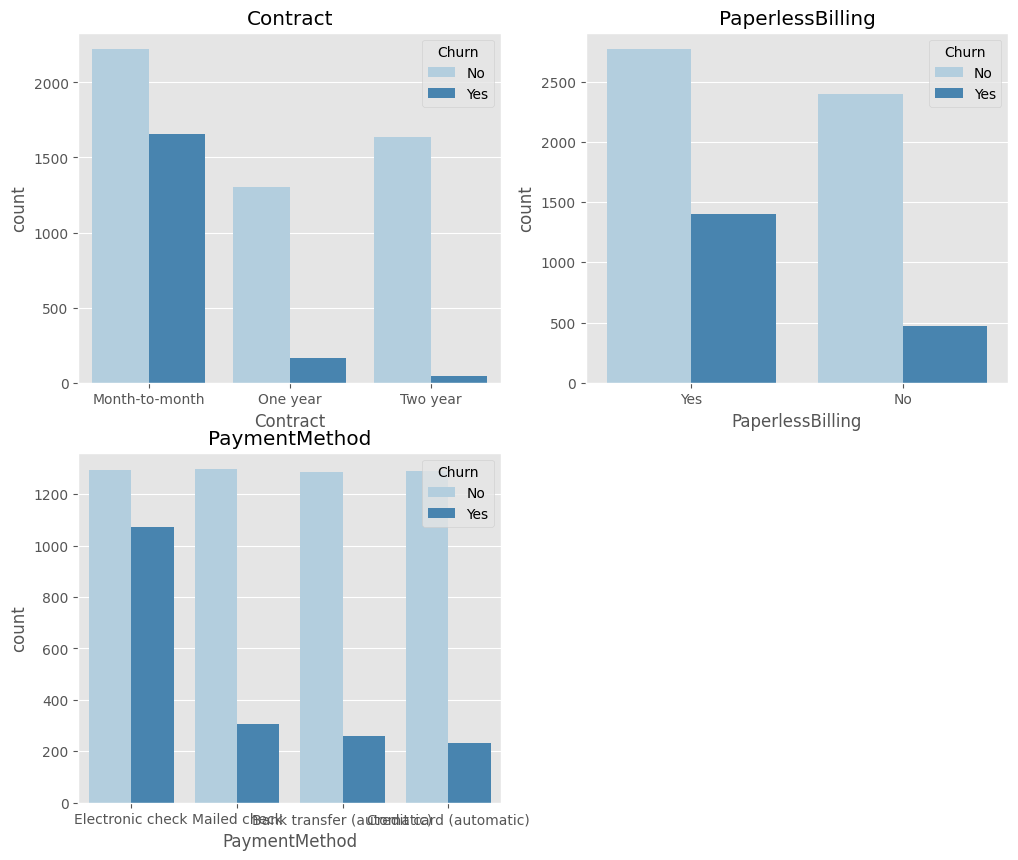

In [13]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

> Biểu đồ thanh sau đây được hiển thị ở trên có thể đưa ra kết luận từ đó:

* Khách hàng có nhiều khả năng rời bỏ hợp đồng hàng tháng hơn (contracts).

* Tỷ lệ rời bỏ cao hơn vừa phải với phương thức thanh toán bằng séc điện tử (payment method).

* Khách hàng thanh toán không cần giấy tờ có tỷ lệ rời bỏ cao hơn (paperless billing).

**Phân tích Thông tin tài khoản khách hàng — Biến số**

In [14]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

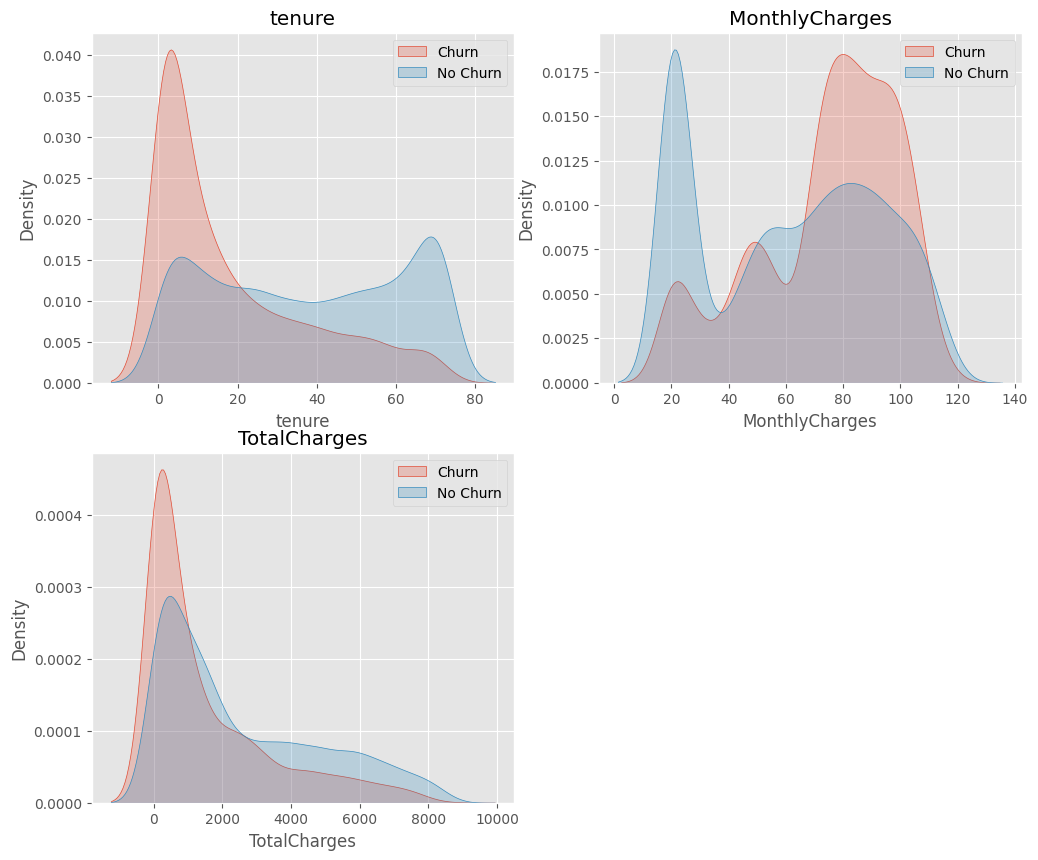

In [15]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

> Các biểu đồ sau đây ở trên chúng ta có thể rút ra kết luận rằng:

* Khách hàng có thời gian sử dụng ngắn hạn sẽ rời bỏ nhiều hơn.

* Những khách hàng phải trả phí hàng tháng nhiều hơn có tỷ lệ rời bỏ cao hơn.

* Khách hàng có tổng phí cao có xu hướng rời bỏ.

**Phân tích thông tin nhân khẩu học của khách hàng**

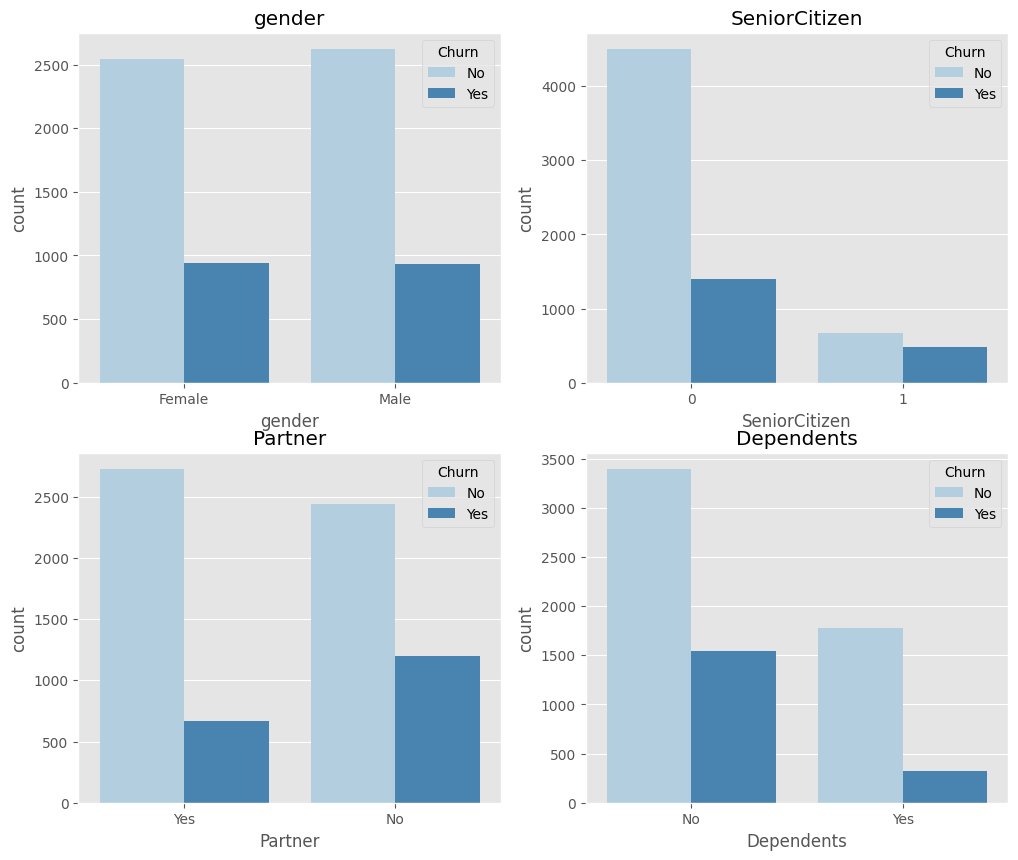

In [16]:
customer_Demographic = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(df,customer_Demographic, "Churn")

> Biểu đồ thanh sau đây ở trên chúng ta có thể rút ra một số kết luận:

* Churn và No Churn không có sự khác biệt đối với mỗi giới tính.

* Khách hàng trẻ có nhiều khả năng rời bỏ hơn là khách hàng cũ.

* Khách hàng có đối tác sẽ ít rời bỏ hơn nếu so sánh với đối tác.

**Kiểm tra Outliers bằng Boxplot cho các biến số**

In [17]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

<ipython-input-17-1c284ca4feb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")
<ipython-input-17-1c284ca4feb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")
<ipython-input-17-1c284ca4feb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = column, data = df, palette = "Blues")


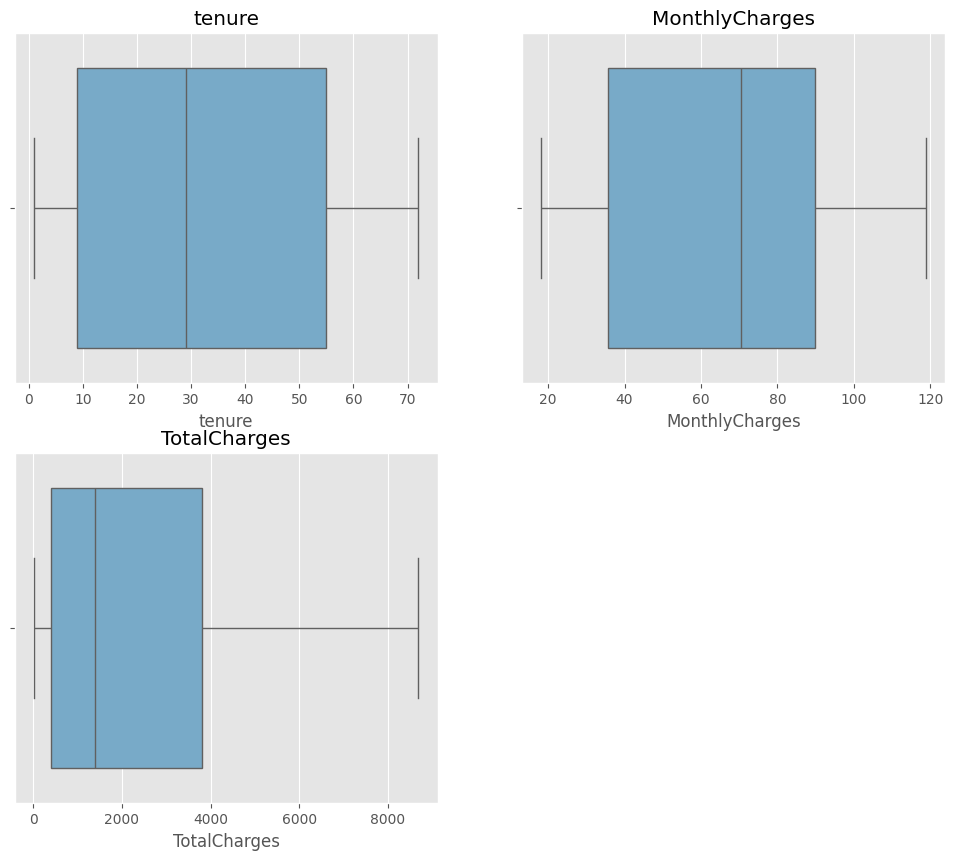

In [18]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

Từ biểu đồ, chúng ta có thể rút ra kết luận rằng mỗi biến số không có giá trị ngoại lệ.



---



## Chuẩn hóa dữ liệu

Chuyển đổi giá trị SenioCitizen về dạng giá trị số Yes:1, No:0

In [65]:
df['SeniorCitizen']= df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

hàm object_to_int chuyển đổi các giá trị object thành giá trị

In [66]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

áp dụng hàm object_to_int cho dataset

In [67]:
df = df.apply(lambda x: object_to_int(x))

In [68]:
#check
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
for col in df.columns:
    print(df[col].value_counts())



---



# Thực hiện train và test set

In [23]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [25]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [26]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



---





---



## Tạo hàm để trực quan ma trận nhầm lẫn

In [28]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()

    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")



---



# SVM

In [70]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [72]:
print('AUC = ', roc_auc_score(y_test, y_pred_svm))
print('Accuracy = ', accuracy_score(y_test, y_pred_svm))
print('F1-score = ', f1_score(y_test, y_pred_svm))

AUC =  0.7097742318947651
Accuracy =  0.8075829383886256
F1-score =  0.5805785123966942


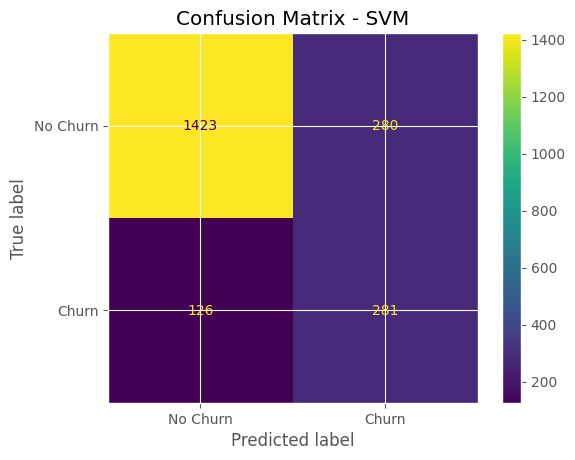

Accuracy Score Test = 0.8075829383886256
Accuracy Score Train = 0.8159284843559529




In [73]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_svm, svm, "SVM")



---



## Cải thiện trọng số Gridsearch

In [74]:
param_grid = {'C': [0.1, 0.001, 0.002],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = -1)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.002],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['sigmoid']},
             verbose=-1)

In [75]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.002, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=0.002, gamma=1, kernel='sigmoid')


In [76]:
svm = SVC(C=0.002, gamma=1, kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1549
           1       0.56      0.01      0.02       561

    accuracy                           0.73      2110
   macro avg       0.65      0.50      0.43      2110
weighted avg       0.69      0.73      0.63      2110



In [78]:
print('AUC = ', roc_auc_score(y_test, y_pred_svm))
print('Accuracy = ', accuracy_score(y_test, y_pred_svm))
print('F1-score = ', f1_score(y_test, y_pred_svm))

AUC =  0.5031651724014918
Accuracy =  0.7345971563981043
F1-score =  0.01754385964912281


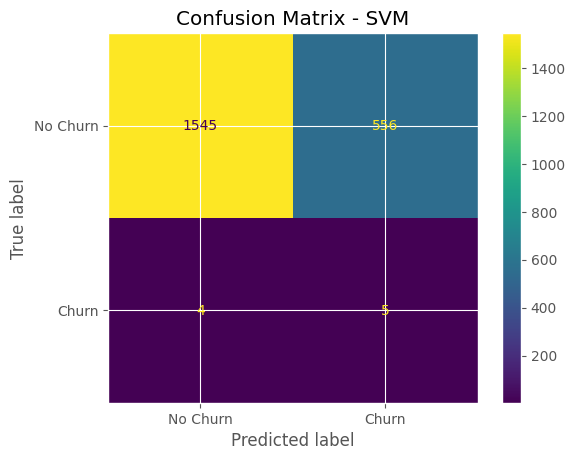

Accuracy Score Test = 0.7345971563981043
Accuracy Score Train = 0.7330353514831369




In [79]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_svm, svm, "SVM")



---



# Hồi quy Logistic

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [44]:
y_pred_logreg_proba = logreg.predict_proba(X_test)

In [45]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



In [46]:
print('AUC = ', roc_auc_score(y_test, y_pred_logreg))
print('Accuracy = ', accuracy_score(y_test, y_pred_logreg))
print('F1-score = ', f1_score(y_test, y_pred_logreg))

AUC =  0.7368925268329058
Accuracy =  0.8090047393364929
F1-score =  0.618732261116367


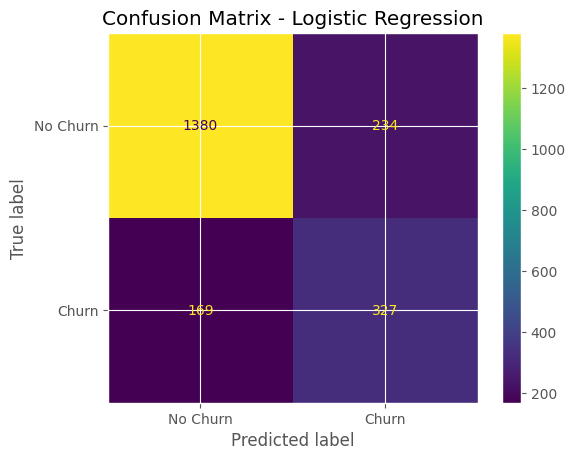

Accuracy Score Test = 0.8090047393364929
Accuracy Score Train = 0.8013002844372207




In [47]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")



---



# Random Forest

In [84]:
RF = RandomForestClassifier(class_weight='balanced' )
RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [86]:
print('AUC = ', roc_auc_score(y_test, y_pred_rf))
print('Accuracy = ', accuracy_score(y_test, y_pred_rf))
print('F1-score = ', f1_score(y_test, y_pred_rf))

AUC =  0.6971710804164378
Accuracy =  0.7924170616113744
F1-score =  0.5584677419354839


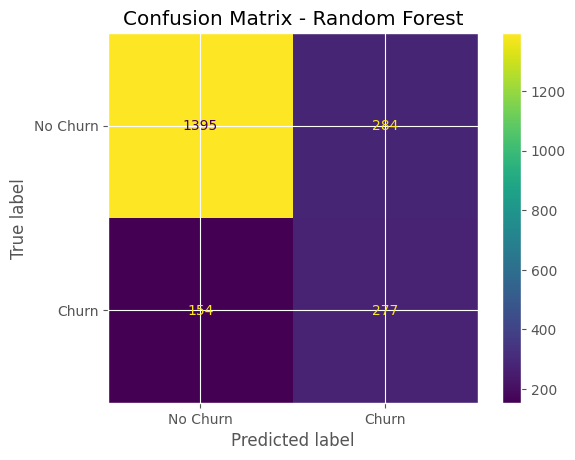

Accuracy Score Test = 0.7924170616113744
Accuracy Score Train = 0.9987809833401057




In [87]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_rf,RF,"Random Forest")